In [64]:
import scipy.signal
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import pandas as pd

# 函数

In [65]:
def plt_spec(input_signal, nfft = 125, noverlap = 20, fs=1000, vim=-100, vmax = 20, ylimt = None):
    '''
    :param input_signal:
    :param fs: 时间序列的采样频率
    :param nfft: 每个段的长度，将数据分割成长为NFFT的片段，计算每个片段的频谱，每个片段的重叠数量由noverlap指定。
    :param noverlap: 段之间重叠的点数，如果没有则noverlap=nperseg/2
    :return: f, t, nd
    '''
    
    plt.figure(figsize=(10, 3))
    
    nd, f, t, im = plt.specgram(input_signal, NFFT=nfft, Fs=fs, noverlap=noverlap, cmap="jet", vmin=vim,vmax=vmax)
    
    plt.ylim(ylimt[0], ylimt[1])
    
    # -------- plot time-frequency --------
    plt.figure(figsize=(10, 5))
    
    plt.subplot(211)
    
    plt.pcolormesh(t, f, nd)
    
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    
    if ylimt is not None:
        plt.ylim(ylimt[0], ylimt[1])
    # -------- plot time-amplitude --------
    
    plt.subplot(212)

    plt.plot(input_signal)
    
    plt.xlim(0,input_signal.shape[0])
    plt.show()
    
    return f, t, nd

def filters(cutoff_low, cutoff_high, data, fs = 1000):
    cutoff_low = cutoff_low/(fs/2)
    b,a = scipy.signal.butter(6,cutoff_low,'low',analog=False)
    data_f_low = scipy.signal.filtfilt(b,a,data)
    
    cutoff_high = cutoff_high/(fs/2)
    b,a = scipy.signal.butter(3,cutoff_high,'high',analog=False)
    data_f_low_high = scipy.signal.filtfilt(b,a,data_f_low)
    
    return data_f_low_high

# 数据集

## 数据集2 (csv)

In [66]:
data = pd.read_csv('../data/input_walk_170308_1307_20.csv',header=None).values
data.shape

(19995, 181)

input_signal.shape:  (19995,)


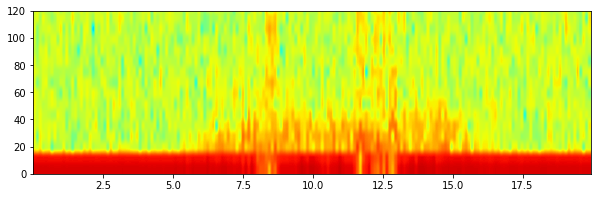

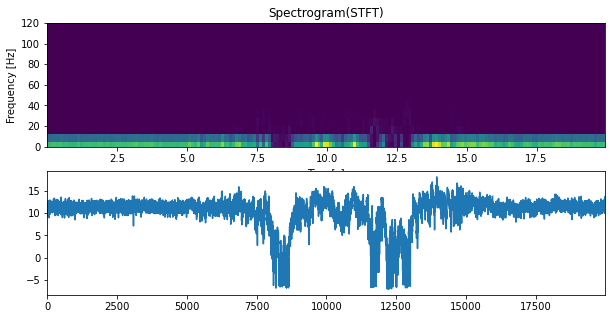

f  (63,) t (190,) nd (63, 190)


In [67]:
input_signal = data[:,1]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = plt_spec(input_signal, nfft = 125, noverlap = 20, fs=1000, vim=-100, vmax = 20, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (19995,)


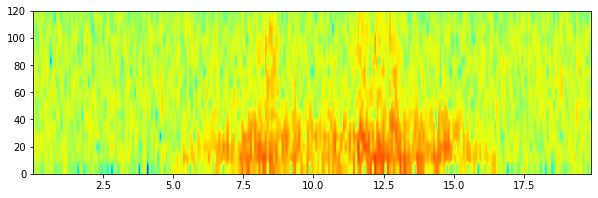

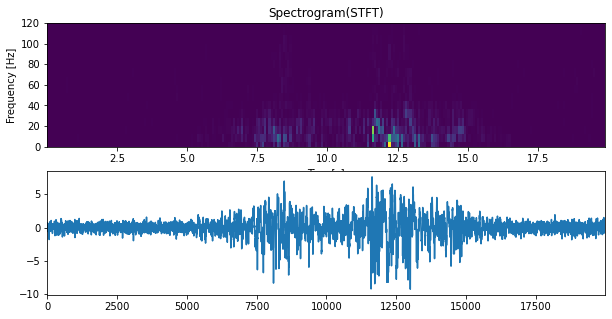

f  (63,) t (265,) nd (63, 265)


In [68]:
input_signal_f = filters(120,2,data[:,1])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = plt_spec(input_signal_f, nfft = 125, noverlap = 50, fs=1000, vim=-100, vmax = 20, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape) 

## 数据集3 (dat)

In [69]:
from CSI_reader.wifilib import *

In [70]:
bf = read_bf_file('../data/userA-1-1-1-1-r1.dat')

In [71]:
csi2_list = list(map(get_scale_csi, bf))
csi2_np = np.array(csi2_list)

csi2_amp = (np.abs(csi2_np))
csi2_amp.shape

(1479, 1, 3, 30)

input_signal.shape:  (1479,)


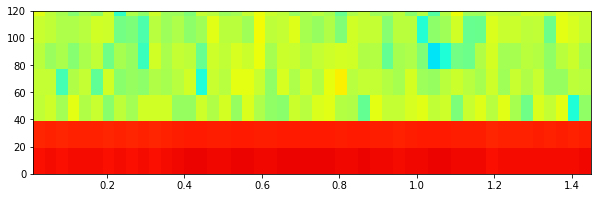

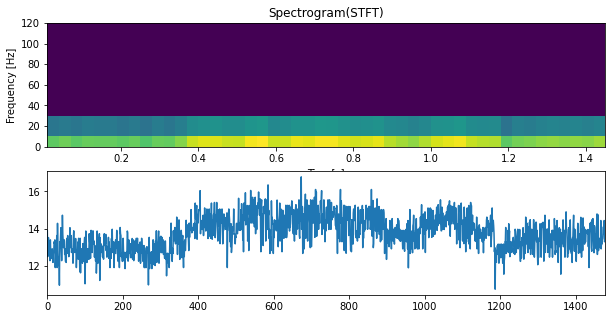

f  (26,) t (48,) nd (26, 48)


In [72]:
input_signal = csi2_amp[:,0,2,10]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = plt_spec(input_signal, nfft = 50, noverlap = 20, fs=1000, vim=-100, vmax = 20, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

### 滤波后

input_signal.shape:  (1479,)


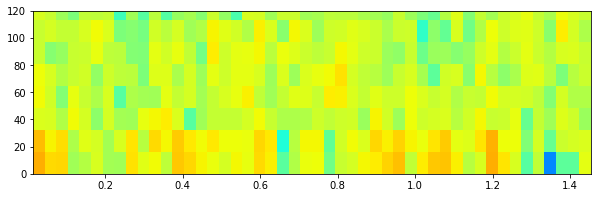

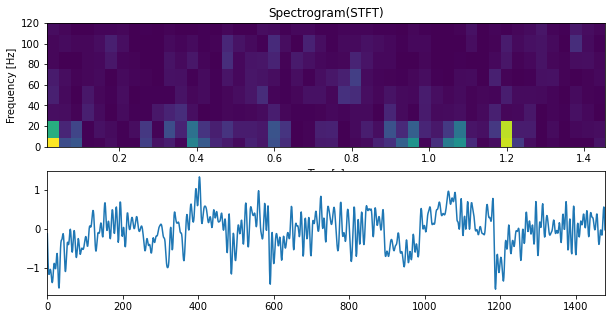

f  (31,) t (48,) nd (31, 48)


In [73]:
input_signal_f = filters(120,2,csi2_amp[:,0,2,10])
print('input_signal.shape: ', input_signal_f.shape)

f, t, nd = plt_spec(input_signal_f, nfft = 60, noverlap = 30, fs=1000, vim=-110, vmax = 20, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)

## 老师那个数据集 (mat)

In [74]:
csi = scio.loadmat(r'../data/test_data_split_amp.mat')
csi['test_data'].shape

(278, 52, 192)

input_signal.shape:  (192,)


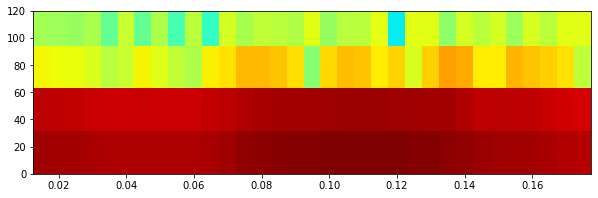

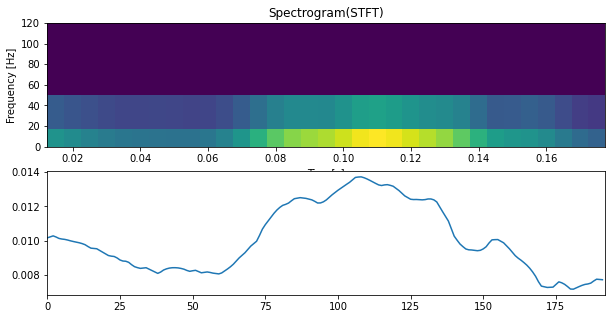

f  (16,) t (33,) nd (16, 33)


In [75]:
input_signal = csi['test_data'][1,0,:]
print('input_signal.shape: ', input_signal.shape)

f, t, nd = plt_spec(input_signal, nfft = 30, noverlap = 25, fs=1000, vim = None, vmax = None, ylimt = [0, 120])

print('f ',f.shape, 't', t.shape, 'nd', nd.shape)